In [2]:
!pip install spotipy

In [3]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd 
import matplotlib.pyplot as plt
import re

# Set Client Details

In [4]:
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(
    client_id = '41ea3eda75d74f8a9a7c448264640f73',
    client_secret = 'cea3d8f8dca94a14b84d66d230cd14c4'
))

# Track URL

In [5]:
track_url = "https://open.spotify.com/track/0pqnGHJpmpxLKifKRmU6WP"

# Extract track id directly from URL using regex

In [6]:
track_id = re.search(r'track/([a-zA-Z0-9]+)', track_url).group(1)

# Fetch track deails

In [7]:
track = sp.track(track_id)
print(track)

{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/53XhwfbYqKCa1cC15pYq2q'}, 'href': 'https://api.spotify.com/v1/artists/53XhwfbYqKCa1cC15pYq2q', 'id': '53XhwfbYqKCa1cC15pYq2q', 'name': 'Imagine Dragons', 'type': 'artist', 'uri': 'spotify:artist:53XhwfbYqKCa1cC15pYq2q'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV',

# Extract meta data

In [8]:
track_data = {
    'Track Name' : track['name'],
    'Artist' : track['artists'][0]['name'],
    'Album' : track['album']['name'],
    'Popularity' : track['popularity'],
    'Duration(minutes)' : track ['duration_ms']/60000
}

# Display meta data

In [9]:
print(f"\nTrack name : {track_data['Track Name']}")
print(f"Artist : {track_data['Artist']}")
print(f"Album : {track_data['Album']}")
print(f"Popularity : {track_data['Popularity']}")
print(f"Duration : {track_data['Duration(minutes)']:.2f} minutes")


Track name : Believer
Artist : Imagine Dragons
Album : Evolve
Popularity : 88
Duration : 3.41 minutes


# Convert meta data to Data Frame

In [10]:
df = pd.DataFrame([track_data])
print("\nTrack Data as DataFrame:")
print(df)


Track Data as DataFrame:
  Track Name           Artist   Album  Popularity  Duration(minutes)
0   Believer  Imagine Dragons  Evolve          88           3.405767


# Save metadata to CSV

In [12]:
df.to_csv('spotify _track_data.csv',index=False)

# Visualize track data

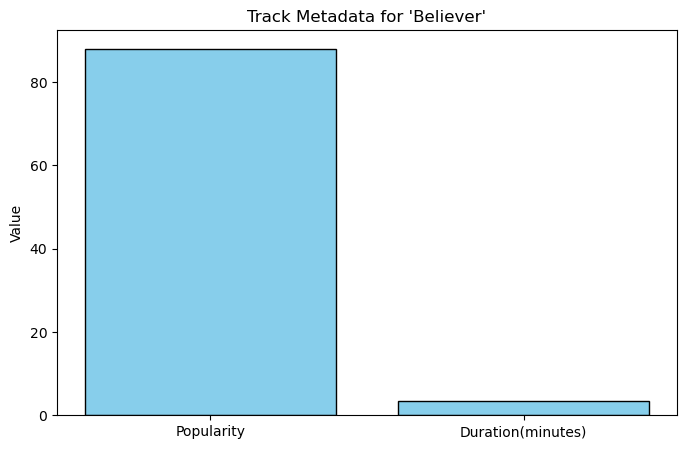

In [34]:
features = ['Popularity','Duration(minutes)']
values  =[track_data['Popularity'],track_data['Duration(minutes)']]

plt.figure (figsize = (8,5))
plt.bar (features,values,color = 'skyblue',edgecolor = 'black')
plt.title(f"Track Metadata for '{track_data['Track Name']}'")
plt.ylabel ('Value')
plt.show()